In [1]:
import ROOT

Welcome to JupyROOT 6.10/02


In [2]:
%jsroot off

In [3]:
x = ROOT.RooRealVar("x","m(jj)[GeV]",50,200)

mean = ROOT.RooRealVar("mean","mean",120,0,250)
sigma = ROOT.RooRealVar("sigma","sigma",10,0.,20)
sig = ROOT.RooGaussian("sig","signal p.d.f.",x,mean,sigma)

coef0 = ROOT.RooRealVar("c0","coefficient #0",-1.0,-2.,2)
coef1 = ROOT.RooRealVar("c1","coefficient #1",0.1,-2.,2)
coef2 = ROOT.RooRealVar("c2","coefficient #2",0.1,-2.,2)
bkg = ROOT.RooChebychev("bkg","background p.d.f.",x,ROOT.RooArgList(coef0,coef1,coef2))

fsig = ROOT.RooRealVar("fsig","signal fraction",0.9,0.,1.)

# model(x) = fsig*sig(x) + (1-fsig)*bkg(x)
model = ROOT.RooAddPdf("model","model",ROOT.RooArgList(sig,bkg),ROOT.RooArgList(fsig))
model2 = ROOT.RooAddPdf("model2","model2",ROOT.RooArgList(sig,bkg),ROOT.RooArgList(fsig))
model3 = ROOT.RooAddPdf("model3","model3",ROOT.RooArgList(sig,bkg),ROOT.RooArgList(fsig))


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [4]:
c1 = ROOT.TCanvas()
xframe = x.frame(ROOT.RooFit.Title("Composite Model"))
#model.plotOn(xframe)
#bkg.plotOn(xframe)
#xframe.Draw()

#c1.Draw()

In [5]:
f_higgs_mass = ROOT.TFile("../outputKinFitNov16.root")
f_higgs_mass_noReg = ROOT.TFile("output.root")
h_higgs_fit_mass_low = f_higgs_mass.Get("fit_mass_lowVpt")


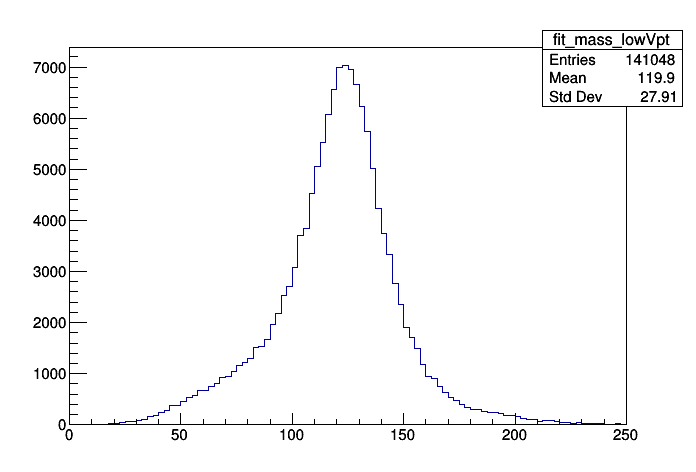

In [6]:
h_higgs_fit_mass_low.Draw()
#h_higgs_fit_mass_low_noReg.Draw("same")
c1.Draw()

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_higgs_fit_mass_low): fit range of variable x expanded to nearest bin boundaries: [50,200] --> [50,200]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (sig,bkg)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c0          -1.00000e+00  4.00000e-01   -2.00000e+00  2.00000e+00
     2 c1           1.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     3 c2           1.00000e-01  4.00000e-01   -2.00000e+00  2.00000e+00
     4 fsig         9.00000e-01  5.00000e-02    0.00000e+00  1.00000e+00
     5 mean         1.20000e+02  2.50000e+01    0.00000e+00  2.50000e+02
     6 sigma        1.00000e+01  2.00000e+00    0.00000e+00  2.00000e+01
 **********
 **    3 **SET ERR    

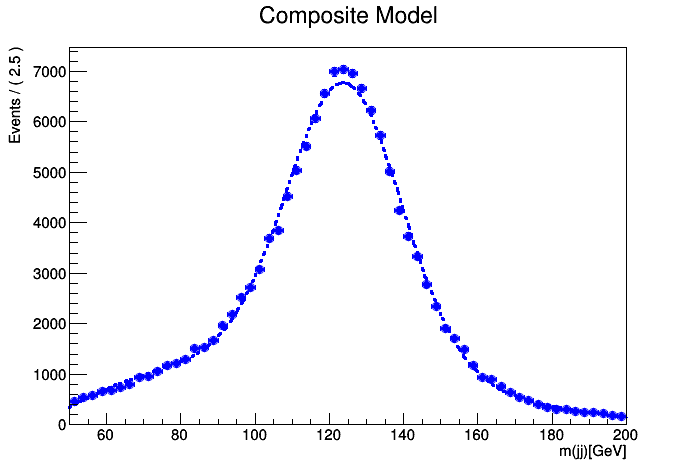

In [7]:
d_higgs_fit_mass_low = ROOT.RooDataHist("d_higgs_fit_mass_low","higgs_fit_mass_low",ROOT.RooArgList(x),h_higgs_fit_mass_low)
model.fitTo(d_higgs_fit_mass_low)
d_higgs_fit_mass_low.plotOn(xframe,ROOT.RooFit.MarkerColor(ROOT.kBlue),ROOT.RooFit.LineColor(ROOT.kBlue),ROOT.RooFit.FillColor(0))
model.plotOn(xframe,ROOT.RooFit.LineStyle(ROOT.kDashed),ROOT.RooFit.FillColor(0))
xframe.Draw()
c1.Draw()

In [8]:
#c1 = ROOT.TCanvas()
#xframe = x.frame(ROOT.RooFit.Title("Composite Model"))
#model.plotOn(xframe)
#bkg.plotOn(xframe)
#xframe.Draw()

#c1.Draw()

In [9]:
leg = ROOT.TLegend()
h_higgs_mass_low = f_higgs_mass.Get("dijet_mass_lowVpt")
d_higgs_mass_low = ROOT.RooDataHist("d_higgs_mass_low","higgs_mass_low",ROOT.RooArgList(x),h_higgs_mass_low)
model2.fitTo(d_higgs_mass_low)
d_higgs_mass_low.plotOn(xframe,ROOT.RooFit.MarkerColor(ROOT.kRed),ROOT.RooFit.LineColor(ROOT.kRed),ROOT.RooFit.FillColor(0))
model2.plotOn(xframe,ROOT.RooFit.LineColor(ROOT.kRed),ROOT.RooFit.LineStyle(ROOT.kDashed),ROOT.RooFit.FillColor(0))

#leg.Draw()


<ROOT.RooPlot object ("frame_x_4049310") at 0x4049310>

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_higgs_mass_low): fit range of variable x expanded to nearest bin boundaries: [50,200] --> [50,200]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (sig,bkg)
 **********
 **   10 **SET PRINT           1
 **********
 **********
 **   11 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c0          -3.85268e-01  7.45668e-03   -2.00000e+00  2.00000e+00
     2 c1          -6.49412e-01  1.27382e-02   -2.00000e+00  2.00000e+00
     3 c2           2.47703e-01  8.98288e-03   -2.00000e+00  2.00000e+00
     4 fsig         6.26258e-01  4.48364e-03    0.00000e+00  1.00000e+00
     5 mean         1.24099e+02  8.19820e-02    0.00000e+00  2.50000e+02
     6 sigma        1.53771e+01  9.57845e-02    0.00000e+00  2.00000e+01
 **********
 **   12 **SET ERR        

In [10]:
h_higgs_fit_mass_low_noReg = f_higgs_mass_noReg.Get("fit_mass_lowVpt")
d_higgs_fit_mass_low_noReg = ROOT.RooDataHist("d_higgs_fit_mass_low_noReg","higgs_fit_mass_low_noReg",ROOT.RooArgList(x),h_higgs_fit_mass_low_noReg)
model3.fitTo(d_higgs_fit_mass_low_noReg)
d_higgs_fit_mass_low_noReg.plotOn(xframe,ROOT.RooFit.MarkerColor(ROOT.kGreen),ROOT.RooFit.LineColor(ROOT.kGreen),ROOT.RooFit.FillColor(0))
model3.SetTitle("kinFit + regression")
model3.plotOn(xframe,ROOT.RooFit.LineColor(ROOT.kGreen),ROOT.RooFit.LineStyle(ROOT.kDashed),ROOT.RooFit.FillColor(0))




<ROOT.RooPlot object ("frame_x_4049310") at 0x4049310>

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_higgs_fit_mass_low_noReg): fit range of variable x expanded to nearest bin boundaries: [50,200] --> [50,200]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (sig,bkg)
 **********
 **   19 **SET PRINT           1
 **********
 **********
 **   20 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c0          -6.16951e-01  7.66946e-03   -2.00000e+00  2.00000e+00
     2 c1          -4.48536e-01  1.45454e-02   -2.00000e+00  2.00000e+00
     3 c2           3.65650e-01  1.01167e-02   -2.00000e+00  2.00000e+00
     4 fsig         6.47506e-01  4.48348e-03    0.00000e+00  1.00000e+00
     5 mean         1.17214e+02  7.45530e-02    0.00000e+00  2.50000e+02
     6 sigma        1.43973e+01  8.19285e-02    0.00000e+00  2.00000e+01
 **********
 **   21 **SET E

Info in <TCanvas::SaveAs>: ROOT file compareLowVpt.root has been created
Info in <TCanvas::Print>: pdf file compareLowVpt.pdf has been created
Info in <TCanvas::SaveSource>: C++ Macro file: compareLowVpt.C has been generated


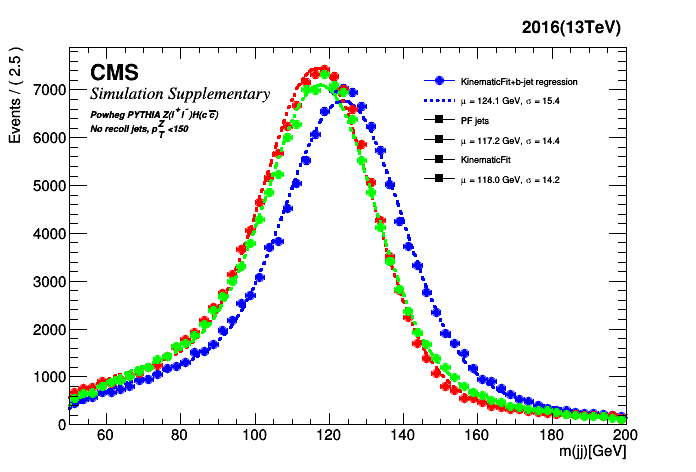

In [11]:
leg = ROOT.TLegend(0.60,0.85,0.85,0.6)
leg.SetBorderSize(0)
leg.AddEntry("h_d_higgs_fit_mass_low","KinematicFit+b-jet regression","lpflpf")
leg.AddEntry("model_Norm[x]","#mu = 124.1 GeV, #sigma = 15.4","lpflpflpf")
leg.AddEntry("h_d_higgs_mass_low","PF jets","lpflpflpflpf")
leg.AddEntry("model2_Norm[x]","#mu = 117.2 GeV, #sigma = 14.4","lpflpflpf")
leg.AddEntry("h_d_higgs_fit_mass_low_noReg","KinematicFit","lpflpflpflpflpflpf")
leg.AddEntry("model3_Norm[x]","#mu = 118.0 GeV, #sigma = 14.2","lpflpflpf")


pre = ROOT.TLatex(0.75,.93,"#scale[.8]{2016(13TeV)}")
pre.SetNDC()
prelim = ROOT.TLatex(0.13,0.83,"#scale[1]{CMS}")
prelim.SetNDC()
prelim2 = ROOT.TLatex(0.13,0.79,"#font[12]{#scale[0.8]{Simulation Supplementary}}")
prelim2.SetNDC()
prelim3 = ROOT.TLatex(0.13,0.75,"#font[72]{#scale[0.4]{Powheg PYTHIA Z(l^{+}l^{-})H(c#bar{c})}}")
prelim3.SetNDC()
prelim4 = ROOT.TLatex(0.13,0.72,"#font[72]{#scale[0.4]{No recoil jets, p_{T}^{Z} <150}}")
prelim4.SetNDC()

xframe.SetTitle("")
xframe.Draw()
#legg = c1.BuildLegend(0.13,0.7,0.5,0.3)
#legg.SetBorderSize(0)
#legg.DeleteEntry()
leg.Draw()
c1.SetTicks(1,1)
pre.Draw()
prelim.Draw()
prelim2.Draw()
prelim3.Draw()
prelim4.Draw()

c1.Draw()
c1.SaveAs("compareLowVpt.root")
c1.SaveAs("compareLowVpt.pdf")

c1.SaveAs("compareLowVpt.C")

In [12]:
xframe2 = x.frame(ROOT.RooFit.Title("Composite Model"))

h_higgs_mass_high = f_higgs_mass.Get("dijet_mass_highVpt")
d_higgs_mass_high = ROOT.RooDataHist("d_higgs_mass_high","higgs_mass_high",ROOT.RooArgList(x),h_higgs_mass_high)
model.fitTo(d_higgs_mass_high)
d_higgs_mass_high.plotOn(xframe2,ROOT.RooFit.MarkerColor(ROOT.kRed),ROOT.RooFit.LineColor(ROOT.kRed),ROOT.RooFit.FillColor(0))
model.plotOn(xframe2,ROOT.RooFit.LineColor(ROOT.kRed),ROOT.RooFit.LineStyle(ROOT.kDashed),ROOT.RooFit.FillColor(0))



<ROOT.RooPlot object ("frame_x_4ad3b60") at 0x4ad3b60>

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_higgs_mass_high): fit range of variable x expanded to nearest bin boundaries: [50,200] --> [50,200]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (sig,bkg)
 **********
 **   28 **SET PRINT           1
 **********
 **********
 **   29 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c0          -5.41684e-01  6.54393e-03   -2.00000e+00  2.00000e+00
     2 c1          -6.41733e-01  1.18737e-02   -2.00000e+00  2.00000e+00
     3 c2           3.65178e-01  8.67575e-03   -2.00000e+00  2.00000e+00
     4 fsig         5.94431e-01  4.51355e-03    0.00000e+00  1.00000e+00
     5 mean         1.17989e+02  7.85600e-02    0.00000e+00  2.50000e+02
     6 sigma        1.42509e+01  9.17625e-02    0.00000e+00  2.00000e+01
 **********
 **   30 **SET ERR       

In [13]:
h_higgs_fit_mass_high = f_higgs_mass.Get("fit_mass_highVpt")
d_higgs_fit_mass_high = ROOT.RooDataHist("d_higgs_fit_mass_high","higgs_fit_mass_high",ROOT.RooArgList(x),h_higgs_fit_mass_high)
model2.fitTo(d_higgs_fit_mass_high)
d_higgs_fit_mass_high.plotOn(xframe2,ROOT.RooFit.MarkerColor(ROOT.kBlue),ROOT.RooFit.LineColor(ROOT.kBlue),ROOT.RooFit.FillColor(0))
model2.plotOn(xframe2,ROOT.RooFit.LineStyle(ROOT.kDashed),ROOT.RooFit.FillColor(0))


<ROOT.RooPlot object ("frame_x_4ad3b60") at 0x4ad3b60>

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_higgs_fit_mass_high): fit range of variable x expanded to nearest bin boundaries: [50,200] --> [50,200]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (sig,bkg)
 **********
 **   37 **SET PRINT           1
 **********
 **********
 **   38 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c0          -6.22717e-01  1.11759e-02   -2.00000e+00  2.00000e+00
     2 c1          -3.83098e-01  1.91863e-02   -2.00000e+00  2.00000e+00
     3 c2           3.46754e-01  1.30221e-02   -2.00000e+00  2.00000e+00
     4 fsig         6.29903e-01  5.09520e-03    0.00000e+00  1.00000e+00
     5 mean         1.20996e+02  9.39335e-02    0.00000e+00  2.50000e+02
     6 sigma        1.27103e+01  9.69565e-02    0.00000e+00  2.00000e+01
 **********
 **   39 **SET ERR   

In [14]:
h_higgs_fit_mass_high_noReg = f_higgs_mass_noReg.Get("fit_mass_highVpt")
d_higgs_fit_mass_high_noReg = ROOT.RooDataHist("d_higgs_fit_mass_high_noReg","higgs_fit_mass_high_noReg",ROOT.RooArgList(x),h_higgs_fit_mass_high_noReg)
model3.fitTo(d_higgs_fit_mass_high_noReg)
d_higgs_fit_mass_high_noReg.plotOn(xframe2,ROOT.RooFit.MarkerColor(ROOT.kGreen),ROOT.RooFit.MarkerColor(ROOT.kGreen),ROOT.RooFit.LineColor(ROOT.kGreen),ROOT.RooFit.FillColor(0))
model3.plotOn(xframe2,ROOT.RooFit.LineColor(ROOT.kGreen),ROOT.RooFit.LineStyle(ROOT.kDashed),ROOT.RooFit.FillColor(0))

<ROOT.RooPlot object ("frame_x_4ad3b60") at 0x4ad3b60>

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(d_higgs_fit_mass_high_noReg): fit range of variable x expanded to nearest bin boundaries: [50,200] --> [50,200]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (sig,bkg)
 **********
 **   46 **SET PRINT           1
 **********
 **********
 **   47 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 c0          -3.97664e-01  1.03505e-02   -2.00000e+00  2.00000e+00
     2 c1          -6.04546e-01  1.58432e-02   -2.00000e+00  2.00000e+00
     3 c2           2.03664e-01  1.19981e-02   -2.00000e+00  2.00000e+00
     4 fsig         6.22605e-01  4.23719e-03    0.00000e+00  1.00000e+00
     5 mean         1.21805e+02  7.61686e-02    0.00000e+00  2.50000e+02
     6 sigma        1.10826e+01  8.28802e-02    0.00000e+00  2.00000e+01
 **********
 **   48 **SET 

Info in <TCanvas::SaveAs>: ROOT file compare.root has been created
Info in <TCanvas::Print>: pdf file compareHighVpt.pdf has been created


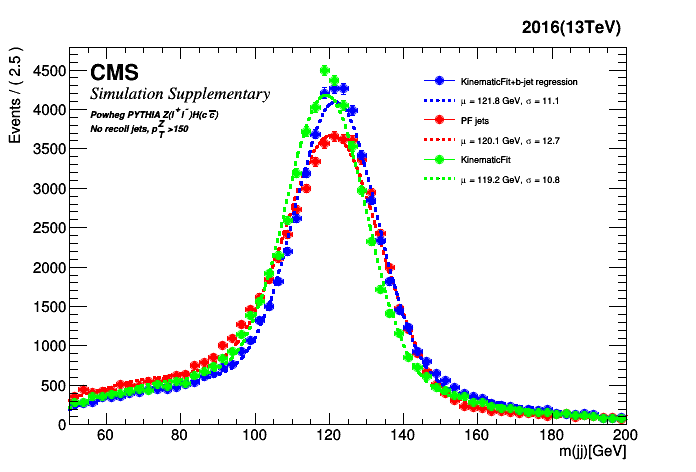

In [15]:
leg = ROOT.TLegend(0.60,0.85,0.85,0.6)
leg.SetBorderSize(0)
leg.AddEntry("h_d_higgs_fit_mass_low","KinematicFit+b-jet regression","lpflpf")
leg.AddEntry("model_Norm[x]","#mu = 121.8 GeV, #sigma = 11.1","lpflpflpf")
leg.AddEntry("h_d_higgs_mass_low","PF jets","lpflpflpflpf")
leg.AddEntry("model2_Norm[x]","#mu = 120.1 GeV, #sigma = 12.7","lpflpflpf")
leg.AddEntry("h_d_higgs_fit_mass_low_noReg","KinematicFit","lpflpflpflpflpflpf")
leg.AddEntry("model3_Norm[x]","#mu = 119.2 GeV, #sigma = 10.8","lpflpflpf")


pre = ROOT.TLatex(0.75,.93,"#scale[.8]{2016(13TeV)}")
pre.SetNDC()
prelim = ROOT.TLatex(0.13,0.83,"#scale[1]{CMS}")
prelim.SetNDC()
prelim2 = ROOT.TLatex(0.13,0.79,"#font[12]{#scale[0.8]{Simulation Supplementary}}")
prelim2.SetNDC()
prelim3 = ROOT.TLatex(0.13,0.75,"#font[72]{#scale[0.4]{Powheg PYTHIA Z(l^{+}l^{-})H(c#bar{c})}}")
prelim3.SetNDC()
prelim4 = ROOT.TLatex(0.13,0.72,"#font[72]{#scale[0.4]{No recoil jets, p_{T}^{Z} >150}}")
prelim4.SetNDC()

xframe2.SetTitle("")
xframe2.Draw()
#legg = c1.BuildLegend(0.13,0.7,0.5,0.3)
#legg.SetBorderSize(0)
#legg.DeleteEntry()
leg.Draw()
c1.SetTicks(1,1)
pre.Draw()
prelim.Draw()
prelim2.Draw()
prelim3.Draw()
prelim4.Draw()


#xframe2.Draw()
#c1.BuildLegend()
c1.Draw()
c1.SaveAs("compare.root")
c1.SaveAs("compareHighVpt.pdf")

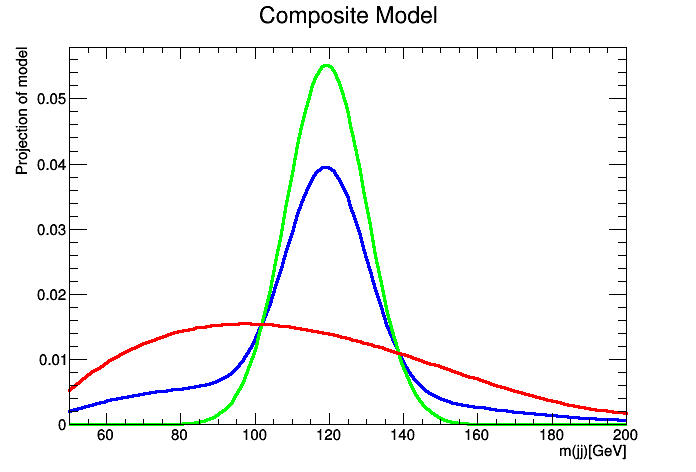

In [16]:
xframe3 = x.frame(ROOT.RooFit.Title("Composite Model"))

model.plotOn(xframe3)
sig.plotOn(xframe3,ROOT.RooFit.LineColor(ROOT.kGreen))
bkg.plotOn(xframe3,ROOT.RooFit.LineColor(ROOT.kRed))
xframe3.Draw()
c1.Draw()